# Classification

### Speaker Accent Recognition Data Set

Link - https://archive.ics.uci.edu/ml/datasets/Speaker+Accent+Recognition#

Data set featuring single English words read by speakers from six different countries for accent detection and recognition.

<b>Explanatory variables</b>: X1, X2, ..., X12  (MFCC (audio features) on the original time domain soundtrack of the maximum 1s of reading of a word)

<b>Response variable</b>: language accent = {ES, FR, GE, IT, UK, US} 

<b>Algorithms tested</b>: K-NN, logistic regression, Random Forest

In [80]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import LinearSVC, SVC
# from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve, precision_recall_curve
# from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier


from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [4]:
path = 'data/accent-recognition-mfcc--1/accent-mfcc-data-1.csv'
df = pd.read_csv(path)
df.head() 

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [5]:
df.tail()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275
328,US,3.214254,-3.135152,1.122691,4.712444,5.926518,6.915566,-5.799727,10.858532,-11.659845,10.605734,0.349482,-5.983281


In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
language    329 non-null object
X1          329 non-null float64
X2          329 non-null float64
X3          329 non-null float64
X4          329 non-null float64
X5          329 non-null float64
X6          329 non-null float64
X7          329 non-null float64
X8          329 non-null float64
X9          329 non-null float64
X10         329 non-null float64
X11         329 non-null float64
X12         329 non-null float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


In [8]:
df.isnull().sum() 

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64

In [9]:
df.shape

(329, 13)

In [10]:
df.nunique() 

language      6
X1          329
X2          329
X3          329
X4          329
X5          329
X6          329
X7          329
X8          329
X9          329
X10         329
X11         329
X12         329
dtype: int64

'\nNormal-like distribution but not centered at 0 for X1, X8, X12.\nOthers are skewed to one side.\nNeed to scale all features to [0,1]\n'

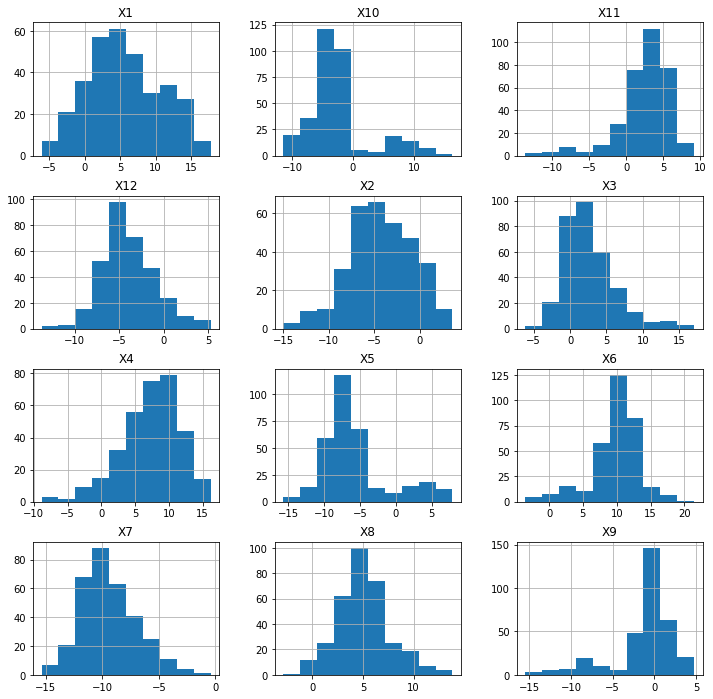

In [11]:
# Histogram to visualize data
df_visual_hist = df.hist(figsize = (12,12))

"""
Normal-like distribution but not centered at 0 for X1, X8, X12.
Others are skewed to one side.
Need to scale all features to [0,1]
"""

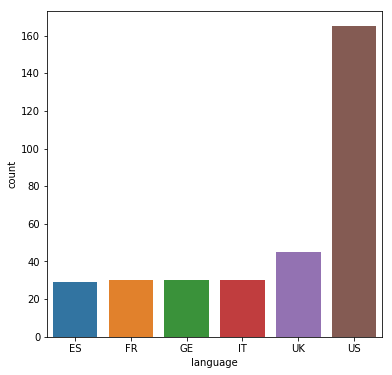

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x="language",  data=df)

In [13]:
df.language.value_counts()
# data distribution is not uniform for the target variables so stratified train-test split is needed 

# one-hot encoding of target variables is also needed

US    165
UK     45
IT     30
FR     30
GE     30
ES     29
Name: language, dtype: int64

No clear distinction of classes in 2 dimensional space. Perhaps higher dimensions have a clearer distinction.


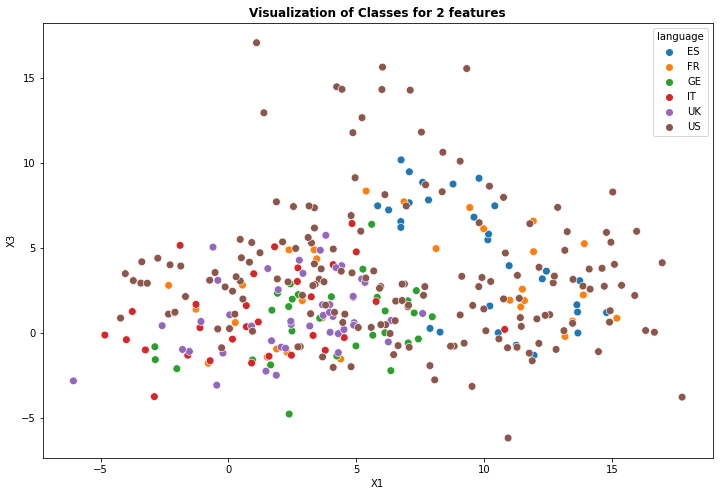

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='X1', y='X3',  hue='language', legend='full', s = 60)
plt.title('Visualization of Classes for 2 features', fontweight ='bold')

print('No clear distinction of classes in 2 dimensional space. Perhaps higher dimensions have a clearer distinction.')

In [15]:
# # plt.figure(figsize=(20,20))
# sns.FacetGrid(df, hue='language', size=5).map(plt.scatter, "X1", "X3").add_legend()
# plt.show()

##### since sufficient data isn't available, algorithms might underfit 
##### so instead of classifying into 6 targets, clasification will be done into US(165) and non-US(164) accents

### MinMax Scaling and One-Hot Encoding

In [16]:
#scaling input features
scaler = MinMaxScaler()

feature_list = df.drop('language',axis = 1).columns

scaled_data = scaler.fit_transform(df[feature_list])

df_norm = pd.DataFrame(scaled_data, columns = feature_list) # new df

df_norm.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.491780,0.577130,0.379387,0.641183,0.424612,0.534106,0.398726,0.477944,0.703491,0.326668,0.704985,0.513271
std,0.214349,0.189517,0.156337,0.172244,0.195006,0.145132,0.166255,0.158530,0.179048,0.181658,0.152363,0.157288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341487,0.456068,0.271948,0.541302,0.307132,0.487392,0.284093,0.380147,0.677894,0.228626,0.650976,0.409971
50%,0.462767,0.578117,0.353323,0.665340,0.376332,0.556893,0.378491,0.461543,0.744842,0.292050,0.737349,0.492520
75%,0.665954,0.723302,0.445731,0.758233,0.474908,0.613151,0.493674,0.565958,0.802473,0.357518,0.803216,0.607497
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# one-hot encoding target and appending to new df

# label encoder to encode categorical target to integers and then OHE for converting intgers to binary sparse matrix
encoderL = LabelEncoder()
target_int = encoderL.fit_transform(df['language'])


target_ohe = to_categorical(target_int)

target_ohe.shape

(329, 6)

In [18]:
# drop non-US columns

target_ohe = np.delete(target_ohe, np.s_[:-1], axis = 1)
target_ohe.shape

(329, 1)

In [19]:
target = pd.DataFrame(target_ohe, columns = ['US Accent'])
target.head()

,US Accent
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [20]:
target.tail()

,US Accent
324,1.0
325,1.0
326,1.0
327,1.0
328,1.0


In [21]:
data = pd.DataFrame()

data = data.join(df_norm,how='outer')
data = data.join(target,how='outer')

#final data
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
0,0.551662,0.456222,0.595078,0.799060,0.339393,0.641166,0.244678,0.376823,0.836103,0.310439,0.636467,0.446694,0.0
1,0.715888,0.529317,0.436013,0.814190,0.340210,0.627235,0.222828,0.380731,0.793382,0.249332,0.700663,0.395198,0.0
2,0.583388,0.512059,0.602193,0.720605,0.359962,0.610386,0.101626,0.445452,0.680924,0.152226,0.597992,0.382487,0.0
3,0.537916,0.500657,0.547600,0.713116,0.370465,0.610204,0.200197,0.540895,0.737218,0.194913,0.658018,0.388108,0.0
4,0.499825,0.520198,0.587400,0.707011,0.376902,0.648901,0.204168,0.436019,0.773583,0.280461,0.692739,0.363883,0.0


In [22]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
324,0.232708,0.598835,0.418650,0.413236,0.812382,0.375533,0.509893,0.754350,0.185037,0.668660,0.607707,0.620390,1.0
325,0.166844,0.749572,0.318409,0.331430,0.777412,0.439599,0.598837,0.824223,0.215588,0.654193,0.706326,0.721572,1.0
326,0.343641,0.567927,0.496148,0.500321,0.779505,0.288756,0.727150,0.877540,0.171419,0.684377,0.571967,0.604681,1.0
327,0.267341,0.824959,0.407968,0.435128,0.818494,0.409325,0.648486,0.889619,0.177237,0.579831,0.650976,0.605463,1.0
328,0.389714,0.638373,0.314336,0.541765,0.915726,0.418203,0.640220,0.821318,0.189702,0.793890,0.613819,0.407765,1.0


In [23]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.491780,0.577130,0.379387,0.641183,0.424612,0.534106,0.398726,0.477944,0.703491,0.326668,0.704985,0.513271,0.501520
std,0.214349,0.189517,0.156337,0.172244,0.195006,0.145132,0.166255,0.158530,0.179048,0.181658,0.152363,0.157288,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.341487,0.456068,0.271948,0.541302,0.307132,0.487392,0.284093,0.380147,0.677894,0.228626,0.650976,0.409971,0.000000
50%,0.462767,0.578117,0.353323,0.665340,0.376332,0.556893,0.378491,0.461543,0.744842,0.292050,0.737349,0.492520,1.000000
75%,0.665954,0.723302,0.445731,0.758233,0.474908,0.613151,0.493674,0.565958,0.802473,0.357518,0.803216,0.607497,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No clear distinction of the classes in 2 dimensional space (for these 2 features). Perhaps higher dimensions have a clearer distinction.


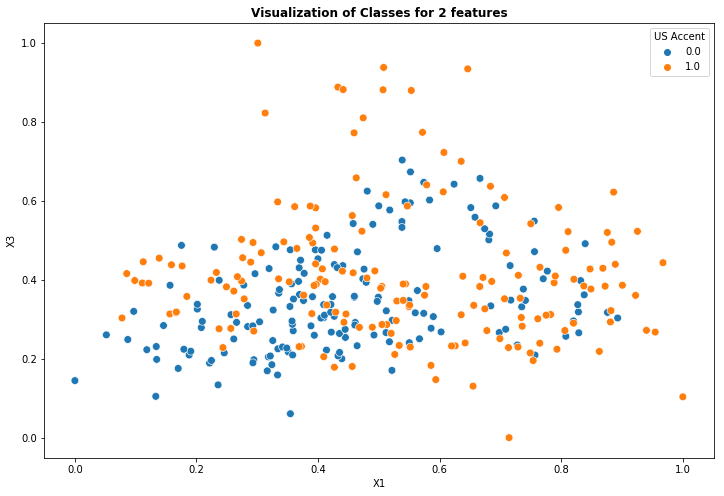

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=data, x='X1', y='X3',  hue='US Accent', legend='full', s = 60)
plt.title('Visualization of Classes for 2 features', fontweight ='bold')

print('No clear distinction of the classes in 2 dimensional space (for these 2 features). Perhaps higher dimensions have a clearer distinction.')

### Stratified Train-Test Split

In [25]:
def train_validate_test_split(df, train_percent, validate_percent, seed=42):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

train, val, test =  train_validate_test_split(data, 0.7, 0.15)

In [26]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.488234,0.577726,0.376603,0.634685,0.415502,0.536066,0.390190,0.469375,0.705745,0.325408,0.706852,0.510652,0.482609
std,0.212202,0.193917,0.161389,0.168115,0.188527,0.144272,0.162943,0.154731,0.174624,0.174344,0.147987,0.159228,0.500787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012385,0.189637,0.000000,0.000000
25%,0.334154,0.454013,0.264392,0.543065,0.302445,0.489606,0.284530,0.380375,0.680863,0.234315,0.646341,0.408907,0.000000
50%,0.463752,0.573875,0.351476,0.660389,0.376071,0.558294,0.373769,0.459488,0.742459,0.297444,0.738991,0.486323,0.000000
75%,0.648887,0.722371,0.464728,0.739976,0.463899,0.610340,0.480608,0.556364,0.794849,0.358551,0.807882,0.604540,1.000000
max,0.967306,0.997626,1.000000,0.957984,1.000000,0.893161,1.000000,1.000000,0.982271,1.000000,1.000000,1.000000,1.000000


In [27]:
val.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.496828,0.549224,0.406084,0.646511,0.459413,0.520522,0.397953,0.485400,0.693093,0.334143,0.684663,0.523744,0.591837
std,0.222493,0.193052,0.145489,0.183749,0.213840,0.162366,0.171615,0.171881,0.182224,0.219748,0.177657,0.162398,0.496587
min,0.077483,0.036596,0.195553,0.281078,0.147392,0.027901,0.089373,0.112091,0.215588,0.000000,0.093544,0.141966,0.000000
25%,0.357125,0.454841,0.303356,0.494997,0.345505,0.485781,0.262548,0.375723,0.660689,0.200336,0.654158,0.398937,0.000000
50%,0.461143,0.558215,0.389314,0.686260,0.384273,0.546754,0.375556,0.479597,0.752053,0.291351,0.710394,0.513726,1.000000
75%,0.683510,0.734043,0.455972,0.788421,0.510936,0.604141,0.519018,0.579753,0.823474,0.337365,0.791680,0.636204,1.000000
max,0.892763,0.852048,0.938261,0.959577,0.930423,1.000000,0.878203,0.865955,0.965354,0.902865,0.918990,0.885027,1.000000


In [28]:
test.describe() # mean and std of target values is comparable in train set, test set and original data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,US Accent
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.503143,0.601740,0.366026,0.665851,0.432417,0.538406,0.438748,0.510053,0.703311,0.325144,0.716315,0.515052,0.500000
std,0.220000,0.163631,0.142176,0.180521,0.204908,0.132946,0.173533,0.161076,0.198554,0.177404,0.146854,0.145374,0.505076
min,0.112406,0.212953,0.103470,0.153095,0.043236,0.070268,0.140060,0.256706,0.177237,0.056494,0.000000,0.216163,0.000000
25%,0.360528,0.480639,0.271515,0.546805,0.317300,0.471101,0.298534,0.382173,0.682037,0.234472,0.655861,0.424700,0.000000
50%,0.460215,0.615906,0.348134,0.678562,0.368265,0.559146,0.419414,0.462092,0.748576,0.274565,0.747035,0.505712,0.500000
75%,0.672003,0.713398,0.421095,0.808839,0.424298,0.621614,0.567828,0.610196,0.818464,0.352716,0.790707,0.596797,1.000000
max,1.000000,1.000000,0.934609,1.000000,0.915726,0.731476,0.873001,0.906677,1.000000,0.803146,0.970179,0.914050,1.000000


In [29]:
target_col = target.columns.unique()
X_train = train.drop(columns = target_col)
y_train = train[target_col]
X_val = val.drop(columns = target_col)
y_val = val[target_col]
X_test = test.drop(columns = target_col)
y_test = test[target_col]

In [30]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.488234,0.577726,0.376603,0.634685,0.415502,0.536066,0.390190,0.469375,0.705745,0.325408,0.706852,0.510652
std,0.212202,0.193917,0.161389,0.168115,0.188527,0.144272,0.162943,0.154731,0.174624,0.174344,0.147987,0.159228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012385,0.189637,0.000000
25%,0.334154,0.454013,0.264392,0.543065,0.302445,0.489606,0.284530,0.380375,0.680863,0.234315,0.646341,0.408907
50%,0.463752,0.573875,0.351476,0.660389,0.376071,0.558294,0.373769,0.459488,0.742459,0.297444,0.738991,0.486323
75%,0.648887,0.722371,0.464728,0.739976,0.463899,0.610340,0.480608,0.556364,0.794849,0.358551,0.807882,0.604540
max,0.967306,0.997626,1.000000,0.957984,1.000000,0.893161,1.000000,1.000000,0.982271,1.000000,1.000000,1.000000


In [31]:
y_test.describe()

,US Accent
count,50.000000
mean,0.500000
std,0.505076
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


# Models

Trying different models for 70% training data and 15% each validation and testing data with different hyperparameters.

### KNN

Iterate over some k values while doing k-fold cross validation using F1 score as metric.

$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

$precision = \frac{TP}{TP+FP}$

$recall = \frac{TP}{TP+FN}$

In [69]:
krange = range(1,11)
prange = range(1,5)
knnf1 = []
knncm = []

f1max = 0
param = []

for k in krange:
    for p in prange:
        knn = KNeighborsClassifier(n_neighbors=k, p = p)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_val)

#         cm = confusion_matrix(y_val, y_pred)
        f1 = f1_score(y_val, y_pred) 
        #average = 'macro' takes average of the score for each class, weighted takes weighted average

#         knncm.append(cm)
        knnf1.append(f1)
        
        if k != 1:
            if f1 > f1max:
                f1max = f1
                param = [k, p]
#
 
#  
knn = KNeighborsClassifier(n_neighbors=param[0], p=param[1])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

print(cm,f1max, param)

[[17  3]
 [ 1 28]] 0.9333333333333333 [3, 2]


##### k = 1 for knn generally implies overfitting so the next best k value is taken

Test Data
----------
k = 3 p = 2
----------
F1 score: 0.8333333333333333
----------
Confusion Matrix:
[[22  3]
 [ 5 20]]
----------


Text(0.5,1,'Visualization of Test Results - KNN')

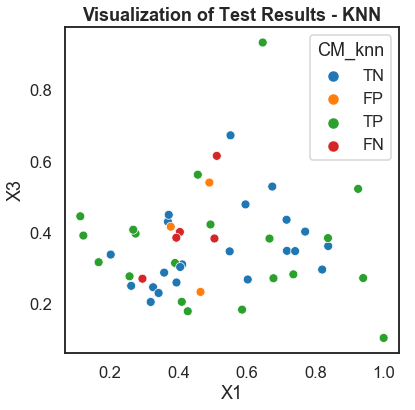

In [91]:
# Test Data

knn = KNeighborsClassifier(n_neighbors=param[0], p=param[1])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
f1_knn = f1_score(y_test, y_pred) 
cm_knn = confusion_matrix(y_test, y_pred)
print('Test Data')
print('----------')
print('k =',param[0],'p =',param[1])
print('----------')
print('F1 score:',f1_knn)
print('----------')
print('Confusion Matrix:')
print(cm_knn)
print('----------')


cm_ohe = np.zeros((len(y_pred),4))
cm_int = np.zeros((len(y_pred),1))
cm_str = []
# TP(1,1) FP(1,0) TN(0,0) FN(0,1) : (y_pred,y_test)

for i in range(len(y_pred)):    
    if  y_pred[i] and y_test.values[i]: #TP
        cm_ohe[i,0] = 1
        cm_int[i] = 0
        cm_str.append('TP')
    else:
        if not(y_pred[i] or y_test.values[i]): # TN
            cm_ohe[i,2] = 1
            cm_int[i] = 2
            cm_str.append('TN')
        elif y_pred[i]: #FP
            cm_ohe[i,1] = 1
            cm_int[i] = 1
            cm_str.append('FP')
        elif y_test.values[i]: # FN
            cm_ohe[i,3] = 1
            cm_int[i] = 3
            cm_str.append('FN')
            

target = pd.DataFrame(cm_str, columns = ['CM_knn'])
test = pd.DataFrame()
test = test.join(X_test.reset_index(),how='outer')
test = test.join(target,how='outer')
plt.figure(figsize=(6,6))
sns.scatterplot(data=test, x='X1', y='X3',  hue='CM_knn', s = 80)
# plt.legend(['TP','FP','TN','FN'])
plt.title('Visualization of Test Results - KNN', fontweight ='bold')

### Logictic Regression

In [71]:
C_reg = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
# inverse of regularization coeff; small value means more regularization
C_optim = []
# ypred_lr = []
# ypred_lr1 = []
# ypred_lr2 = []
f1max = 0
regL = []

for C in C_reg:
    # Standard logistic regression without regularization
    lr = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train, y_train)
    pred = lr.predict(X_val)
    # For small datasets, ‘liblinear’ is a good choice; lbfgs is default and supports 'none' penalty
#     ypred_lr.append(pred)
    f11 = f1_score(y_val, pred)
    
    # L1 regularized logistic regression
    lr_1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    pred = lr_1.predict(X_val)
#     ypred_lr1.append(pred)
    f12 = f1_score(y_val, pred)
    
    # L2 regularized logistic regression
    lr_2 = LogisticRegression(C=C, penalty='l2', solver='liblinear').fit(X_train, y_train)
    pred = lr_2.predict(X_val)
#     ypred_lr2.append(pred)
    f13 = f1_score(y_val, pred)
    

    if f11 > f1max:
        f1max = f11
        C_optim = C
        regL = 'none'
        
    if f12 > f1max:
        f1max = f12
        C_optim = C
        regL = 'l1'
        
    if f12 > f1max:
        f1max = f13
        C_optim = C
        regL = 'l2'
    

lr =  LogisticRegression(C=C_optim, penalty=regL).fit(X_train, y_train)
pred = lr.predict(X_val)
cm = confusion_matrix(y_val, pred)    
print(cm, f1max, C_optim, regL)

[[17  3]
 [ 8 21]] 0.7924528301886793 0.0001 none


Regularization doesn't seem to impact the performance too much. The algorithm is underfitting and and is unable to capture high dimensional relations between the features too well

Regularization reduces variance and overfitting, both of which aren't really here in the first place.

Test Data
----------
Regularization = none
----------
F1 score: 0.7450980392156863
Confusion Matrix:
[[18  7]
 [ 6 19]]
----------


Text(0.5,1,'Visualization of Test Results - LR')

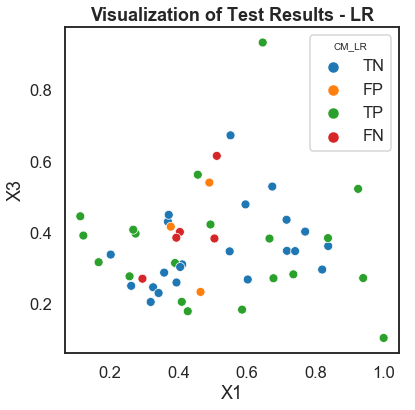

In [72]:
lr = LogisticRegression(penalty='none', solver='lbfgs').fit(X_train, y_train)
ypred = lr.predict(X_test)
f1_lr = f1_score(y_test, ypred)
cm_lr = confusion_matrix(y_test, ypred)
print('Test Data')
print('----------')
print('Regularization =',regL)
print('----------')
print('F1 score:',f1_lr)
print('Confusion Matrix:')
print(cm_lr)
print('----------')


cm_ohe = np.zeros((len(y_pred),4))
cm_int = np.zeros((len(y_pred),1))
cm_str = []
# TP(1,1) FP(1,0) TN(0,0) FN(0,1) : (y_pred,y_test)

for i in range(len(y_pred)):    
    if  y_pred[i] and y_test.values[i]: #TP
        cm_ohe[i,0] = 1
        cm_int[i] = 0
        cm_str.append('TP')
    else:
        if not(y_pred[i] or y_test.values[i]): # TN
            cm_ohe[i,2] = 1
            cm_int[i] = 2
            cm_str.append('TN')
        elif y_pred[i]: #FP
            cm_ohe[i,1] = 1
            cm_int[i] = 1
            cm_str.append('FP')
        elif y_test.values[i]: # FN
            cm_ohe[i,3] = 1
            cm_int[i] = 3
            cm_str.append('FN')
            

target = pd.DataFrame(cm_str, columns = ['CM_LR'])
test = pd.DataFrame()
test = test.join(X_test.reset_index(),how='outer')
test = test.join(target,how='outer')
plt.figure(figsize=(6,6))
sns.scatterplot(data=test, x='X1', y='X3',  hue='CM_LR', s = 80)
# plt.legend(['TP','FP','TN','FN'])
plt.title('Visualization of Test Results - LR', fontweight ='bold')

### Random Forests

In [73]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
# since the only thing changing is the number of trees,
# the warm_start flag can be used so that the model just adds more trees to the existing model each time
# But each RF model is indeoendent of the previous otherwise [bagging ensemble]

oob_list = list()

f1max = 0
n_max = []
oob_min = 1
n_min = []
oob_F = []

for n_trees in [5, 15, 30, 50, 100, 150, 200, 300, 400, 500]:
    
    model = RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred) 
            
    # out-of-bag error: prediction error metric for RF
    oob_error = 1 - RF.oob_score_
    
    if f1 > f1max:
        f1max = f1
        n_max = n_trees
        cmF = confusion_matrix(y_val, pred)  
        oob_F = oob_error
        
    if oob_error < oob_min:
        oob_min = oob_error
        n_min = n_trees
        cm_oob = confusion_matrix(y_val, pred)
        f1_oob = f1_score(y_val, y_pred) 
    
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

print('Max F1 score')
print('----------')
print(cmF)
print('F1 score:', f1max, '#trees:',n_max, 'OOB:', oob_F)
print('----------')
print('----------')
print('Min OOB Error')
print('----------')
print(cm_oob)
print('F1 score:', f1_oob, '#trees:',n_min, 'OOB:',oob_min)

Max F1 score
----------
[[17  3]
 [ 8 21]]
F1 score: 0.9259259259259259 #trees: 200 OOB: 0.19565217391304346
----------
----------
Min OOB Error
----------
[[17  3]
 [ 8 21]]
F1 score: 0.9259259259259259 #trees: 400 OOB: 0.17826086956521736


OOB reaches its elbow point around 400. F1-score reaches max 200 onwards.


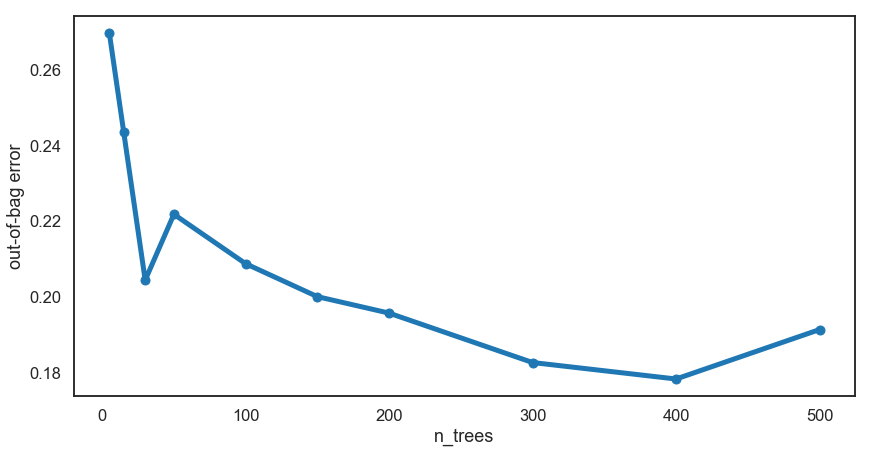

In [74]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

print('OOB reaches its elbow point around 400. F1-score reaches max 200 onwards.')

Test Data
----------
#trees = 400
----------
F1 score: 0.7755102040816326
Confusion Matrix:
[[20  5]
 [ 6 19]]
----------


Text(0.5,1,'Visualization of Test Results - RF')

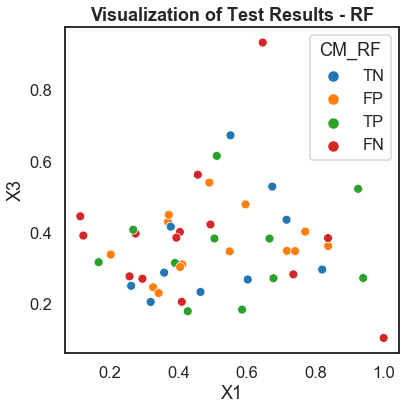

In [75]:
# 400-trees model is chosen

RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=False,
                            n_jobs=-1)
model = RF.set_params(n_estimators=n_min)
RF.fit(X_train, y_train)

ypred = model.predict(X_test)
f1_rf = f1_score(y_test, ypred)
cm_rf = confusion_matrix(y_test, ypred)

print('Test Data')
print('----------')
print('#trees =',n_min)
print('----------')
print('F1 score:',f1_rf)
print('Confusion Matrix:')
print(cm_rf)
print('----------')


cm_ohe = np.zeros((len(y_pred),4))
cm_int = np.zeros((len(y_pred),1))
cm_str = []
# TP(1,1) FP(1,0) TN(0,0) FN(0,1) : (y_pred,y_test)

for i in range(len(y_pred)):    
    if  y_pred[i] and y_test.values[i]: #TP
        cm_ohe[i,0] = 1
        cm_int[i] = 0
        cm_str.append('TP')
    else:
        if not(y_pred[i] or y_test.values[i]): # TN
            cm_ohe[i,2] = 1
            cm_int[i] = 2
            cm_str.append('TN')
        elif y_pred[i]: #FP
            cm_ohe[i,1] = 1
            cm_int[i] = 1
            cm_str.append('FP')
        elif y_test.values[i]: # FN
            cm_ohe[i,3] = 1
            cm_int[i] = 3
            cm_str.append('FN')
            

target = pd.DataFrame(cm_str, columns = ['CM_RF'])
test = pd.DataFrame()
test = test.join(X_test.reset_index(),how='outer')
test = test.join(target,how='outer')
plt.figure(figsize=(6,6))
sns.scatterplot(data=test, x='X1', y='X3',  hue='CM_RF', s = 80)
# plt.legend(['TP','FP','TN','FN'])
plt.title('Visualization of Test Results - RF', fontweight ='bold')

### ROC Curves

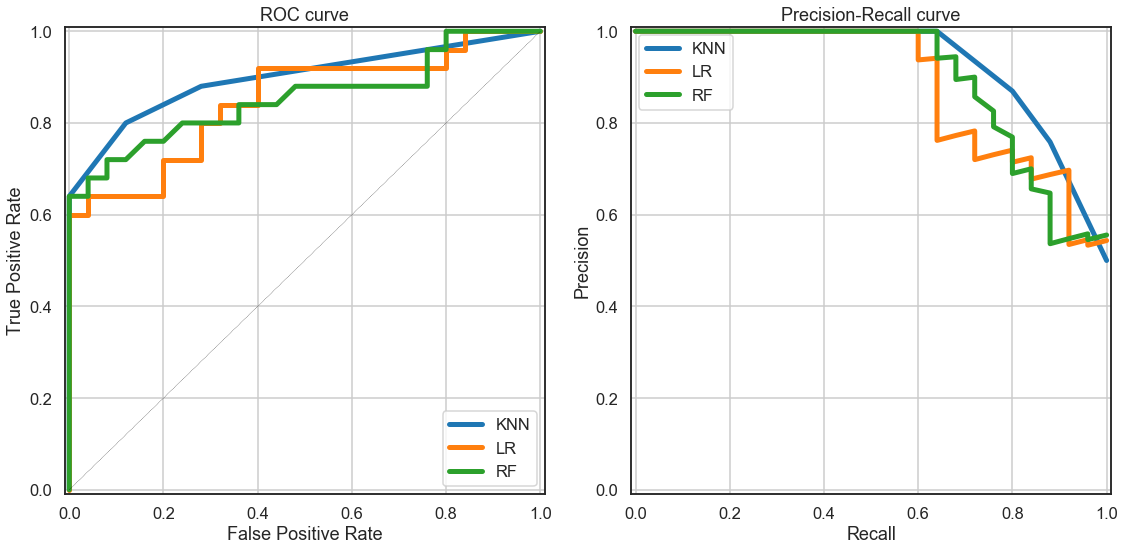

In [99]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob_knn = knn.predict_proba(X_test)
y_prob_lr = lr.predict_proba(X_test)
y_prob_rf = RF.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn[:,1])
ax.plot(fpr, tpr, linewidth=5)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr[:,1])
ax.plot(fpr, tpr, linewidth=5)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)
ax.legend(['KNN','LR','RF'])

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob_knn[:,1])
ax.plot(recall, precision, linewidth=5)
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr[:,1])
ax.plot(recall, precision, linewidth=5)
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)
ax.legend(['KNN','LR','RF'])

plt.tight_layout()

## Summary

Summary of results on test data

F1-score for KNN test data:  0.8333333333333333
F1-score for LR test data:  0.7450980392156863
F1-score for RF test data:  0.7755102040816326


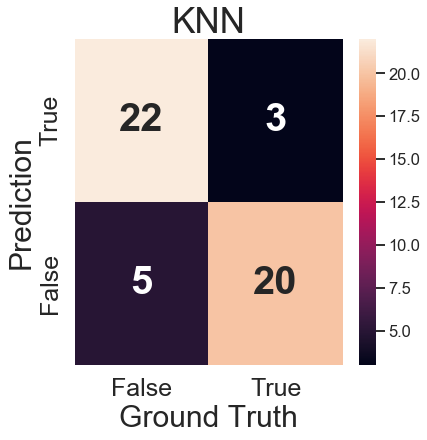

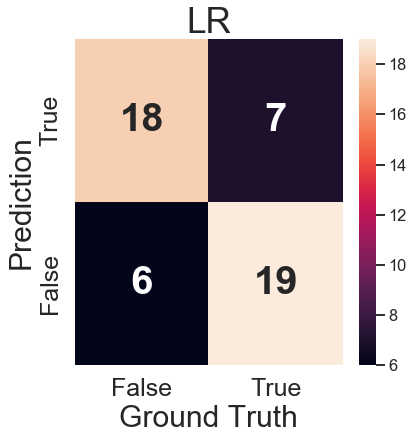

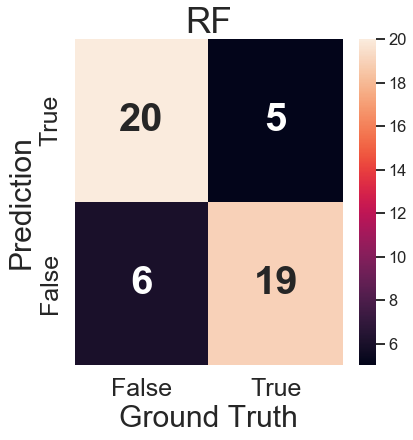

In [90]:
sns.set_context('talk')
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(cm_knn, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
ax.set_title('KNN', fontsize = 35)
print('F1-score for KNN test data: ', f1_knn)



sns.set_context('talk')
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(cm_lr, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
ax.set_title('LR', fontsize = 35)
print('F1-score for LR test data: ', f1_lr)


sns.set_context('talk')
_, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(cm_rf, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25)
ax.set_yticklabels(labels[::-1], fontsize=25)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)
ax.set_title('RF', fontsize = 35)
print('F1-score for RF test data: ', f1_rf)

#### KNN with k=3 and p=2 (euclidean distance) performs the best as per F1-score